In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None) # To display all columns
pd.set_option('display.max_rows',None) # To display all columns
import feather
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
import glob
import warnings
warnings.filterwarnings('ignore')
from functools import reduce

In [101]:
KT1 = pd.read_feather('KT1.ftr')

In [102]:
KT3 = pd.read_feather('KT3.ftr')
questions_df = pd.read_csv('questions.csv')
Users = pd.read_feather('Output.ftr')

In [11]:
KT3.head

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
0,1565096151269,enter,b3544,diagnosis,None,mobile,1
1,1565096187972,respond,q5012,diagnosis,b,mobile,1
2,1565096194904,submit,b3544,diagnosis,None,mobile,1
3,1565096195001,enter,b3238,diagnosis,None,mobile,1
4,1565096218682,respond,q4706,diagnosis,c,mobile,1


In [18]:
KT1.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD
0,1565096190868,1,q5012,b,38000,1
1,1565096221062,2,q4706,c,24000,1
2,1565096293432,3,q4366,b,68000,1
3,1565096339668,4,q4829,a,42000,1
4,1565096401774,5,q6528,b,59000,1


In [103]:
KT1['elapsed_time']= KT1.elapsed_time.div(1000)   #DIVDING THE ELAPSED TIME by 1000 to further check the mean elapsed time by each user

In [104]:
KT1.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD
0,1565096190868,1,q5012,b,38.0,1
1,1565096221062,2,q4706,c,24.0,1
2,1565096293432,3,q4366,b,68.0,1
3,1565096339668,4,q4829,a,42.0,1
4,1565096401774,5,q6528,b,59.0,1


In [105]:
Elapsed_time= KT1.groupby('user_iD' , sort=False)['elapsed_time'].mean()

In [23]:
Elapsed_time.to_csv('Time.csv')

In [24]:
Time = pd.read_csv('Time.csv')

In [25]:
Time.head()

,user_iD,elapsed_time
0,1,49.578442
1,10,29.125000
2,100,33.151485
3,1000,41.128524
4,10004,31.960975


In [12]:
K3 = KT3.loc[KT3['action_type'].isin(['respond'])]

In [13]:
K3.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
1,1565096187972,respond,q5012,diagnosis,b,mobile,1
4,1565096218682,respond,q4706,diagnosis,c,mobile,1
7,1565096290094,respond,q4366,diagnosis,b,mobile,1
10,1565096337361,respond,q4829,diagnosis,a,mobile,1
13,1565096395328,respond,q6528,diagnosis,b,mobile,1


In [3]:
Users.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage
0,1,1082,753,329,69.593346
1,10,16,9,7,56.250000
2,100,33,18,15,54.545455
3,1000,1488,930,558,62.500000
4,10004,2486,1790,696,72.003218


In [97]:
K1_userid_counts = Users.user_iD.value_counts()
mask = K1_userid_counts >= 30
Users_userids = mask[mask].index

Users_Ednet = Users[Users.user_iD.isin(Users_userids)]

In [26]:
dfs = [Users, Time]
df = reduce(lambda left,right: pd.merge(left,right,on='user_iD'), dfs)

In [27]:
df.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
0,1,1082,753,329,69.593346,49.578442
1,10,16,9,7,56.250000,29.125000
2,100,33,18,15,54.545455,33.151485
3,1000,1488,930,558,62.500000,41.128524
4,10004,2486,1790,696,72.003218,31.960975


In [34]:
df.rename(columns={'Time_in_Seconds': 'Time(sec)'}, inplace=True)

In [35]:
df.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,Time(sec)
0,1,1082,753,329,69.593346,49.578442
1,10,16,9,7,56.250000,29.125000
2,100,33,18,15,54.545455,33.151485
3,1000,1488,930,558,62.500000,41.128524
4,10004,2486,1790,696,72.003218,31.960975


In [36]:
df.to_feather('UsersPerformance.ftr')

In [48]:
df_95 = df.loc[df['Percentage'] >= 95]

In [50]:
df_95

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,Time(sec)
7735,251967,22,21,1,95.454545,20.408955
57650,345550,30,29,1,96.666667,10.900000
59682,349364,27,26,1,96.296296,11.814815
96674,428520,47,45,2,95.744681,20.191489
105244,447810,100,96,4,96.000000,22.630000
108707,455343,32,31,1,96.875000,17.968750
109258,456492,22,21,1,95.454545,9.727273
139726,521634,20,19,1,95.000000,15.300000
147308,536351,20,19,1,95.000000,17.900000
149482,541004,31,30,1,96.774194,16.258065


In [51]:
df_85 = df.loc[df['Percentage'] >= 85]

In [53]:
df_85[0:50]

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,Time(sec)
62,10109,2587,2283,304,88.248937,23.095862
183,103,7,6,1,85.714286,23.571429
262,10411,7414,6844,570,92.311842,33.189649
351,10553,802,740,62,92.269327,15.210723
390,10613,880,805,75,91.477273,16.063636
448,10704,9,8,1,88.888889,16.555556
459,10724,55,48,7,87.272727,16.254491
470,10740,7,6,1,85.714286,18.142857
502,10783,1216,1041,175,85.608553,19.933388
646,11011,7286,6265,1021,85.986824,24.472820


In [56]:
df_60 = df.loc[df['Percentage'] <= 60]

In [58]:
df_60[0:50]

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,Time(sec)
1,10,16,9,7,56.250000,29.125000
2,100,33,18,15,54.545455,33.151485
5,100043,714,328,386,45.938375,40.501387
7,1001,6,2,4,33.333333,36.333333
10,10013,145,79,66,54.482759,27.565517
19,1003,202,104,98,51.485149,153.886139
22,10037,5,3,2,60.000000,23.000000
24,10045,760,439,321,57.763158,84.932895
36,10064,6,3,3,50.000000,46.500000
38,10071,445,248,197,55.730337,27.629189


In [65]:
df_95["Time(sec)"].mean()

19.97169779485091

In [66]:
df_85["Time(sec)"].mean()

23.42865284411613

In [67]:
df_60["Time(sec)"].mean()

27.70558848110561

In [68]:
df_Users = df.loc[df['Total Questions Attempted'] >= 500]

In [70]:
df_Users[0:50]

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,Time(sec)
0,1,1082,753,329,69.593346,49.578442
3,1000,1488,930,558,62.500000,41.128524
4,10004,2486,1790,696,72.003218,31.960975
5,100043,714,328,386,45.938375,40.501387
6,10005,1439,986,453,68.519805,22.290342
9,10011,763,544,219,71.297510,26.811204
11,10014,751,555,196,73.901465,23.940072
12,10015,912,571,341,62.609649,29.359647
13,10019,3171,2555,616,80.573951,52.556607
16,10021,1854,1380,474,74.433657,40.914046


In [71]:
df_Users["Time(sec)"].mean()

28.82329101215643

In [86]:
df["Time(sec)"].describe()

count    269523.000000
mean         27.258506
std          24.722604
min           0.000000
25%          20.166667
50%          24.790451
75%          31.100000
max        5170.523810
Name: Time(sec), dtype: float64

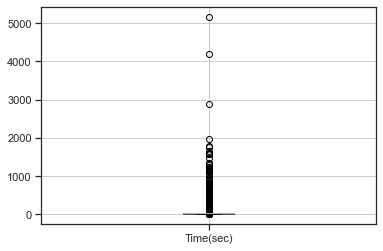

In [95]:
boxplot1 = df.boxplot(column=['Time(sec)'])


In [85]:
df["Total Questions Attempted"].describe()

count    269523.000000
mean        115.845238
std         517.487403
min           2.000000
25%           5.000000
50%           9.000000
75%          24.000000
max       34379.000000
Name: Total Questions Attempted, dtype: float64

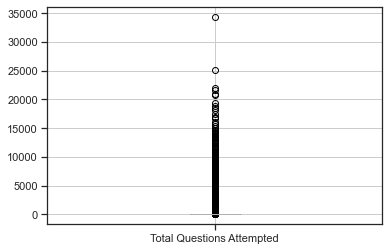

In [96]:
boxplot2 = df.boxplot(column=['Total Questions Attempted'])

In [80]:
df_Users_90 = df_Users.loc[df_Users['Percentage'] >= 85]

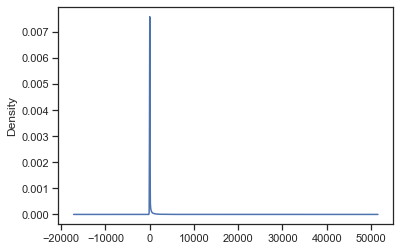

In [89]:
plot2 = df["Total Questions Attempted"].plot.kde()

In [81]:
df_Users_90.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,Time(sec)
62,10109,2587,2283,304,88.248937,23.095862
262,10411,7414,6844,570,92.311842,33.189649
351,10553,802,740,62,92.269327,15.210723
390,10613,880,805,75,91.477273,16.063636
502,10783,1216,1041,175,85.608553,19.933388


In [82]:
df_Users_90["Time(sec)"].mean()

28.480133567692892

In [83]:
df_Users_85 = df_Users.loc[df_Users['Percentage'] < 85]
df_Users_85.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,Time(sec)
0,1,1082,753,329,69.593346,49.578442
3,1000,1488,930,558,62.500000,41.128524
4,10004,2486,1790,696,72.003218,31.960975
5,100043,714,328,386,45.938375,40.501387
6,10005,1439,986,453,68.519805,22.290342


In [79]:
df_Users_85["Time(sec)"].mean()

28.827028152807216